# 01. Importing libraries

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [21]:
# Python shortcut - reusable path
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Data Project 4\06-2025 Instacart Basket Analysis'

In [22]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Data Project 4\\06-2025 Instacart Basket Analysis'

In [23]:
# Importing dataframe
df_merged_filtered_cleaned_final = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pr_merged_filtered_cleaned_newvar_task4.10(2).pkl'))

In [24]:
df_merged_filtered_cleaned_final.shape

(23097351, 33)

In [25]:
# 6) Creating a visualization to show the distribution of profiles
# Crosstab - creating a table on customer profile distribution by region
crosstab = pd.crosstab(df_merged_filtered_cleaned_final['Region'], df_merged_filtered_cleaned_final['customer_profile'], dropna = False)

In [26]:
# Reordered 'Region'
region_order = ['Northeast', 'Midwest', 'South', 'West', 'No region']
df_merged_filtered_cleaned_final['Region'] = pd.Categorical(df_merged_filtered_cleaned_final['Region'], categories=region_order, ordered=True)

In [27]:
crosstab = pd.crosstab(df_merged_filtered_cleaned_final['Region'], df_merged_filtered_cleaned_final['customer_profile'], dropna = False)

In [28]:
crosstab.to_clipboard()

In [29]:
crosstab

customer_profile,High profile customer,Low profile customer,Other
Region,,,
Northeast,927,2442853,1649770
Midwest,1357,3163420,2234922
South,1846,4612645,3074966
West,1412,3515281,2397952
No region,0,0,0


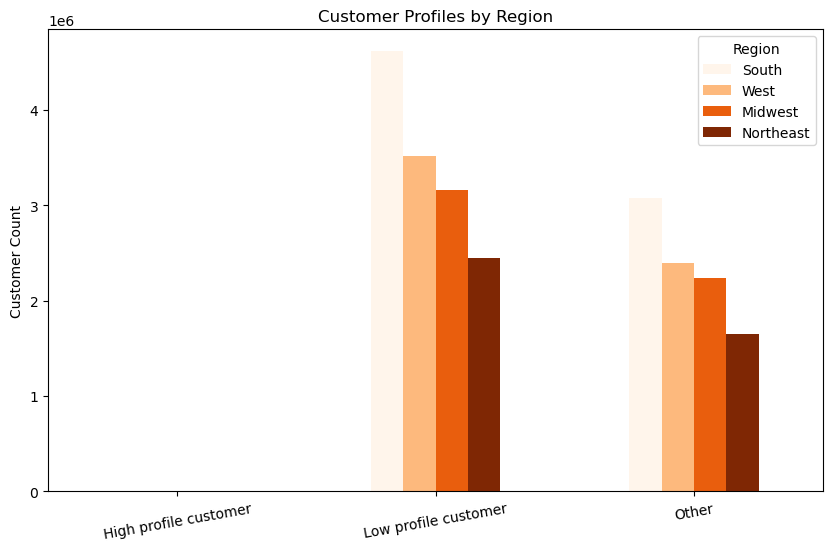

In [85]:
# Creating a bar chart on the distribution of profiles by region
bar1_final_task = df_merged_filtered_cleaned_final.value_counts(['customer_profile', 'Region']).unstack().plot(kind='bar', figsize=(10,6), title='Customer Profiles by Region', colormap='Oranges')
bar1_final_task.set_xlabel('')
bar1_final_task.set_ylabel('Customer Count')
plt.xticks(rotation=10)
plt.show()

In [86]:
# Saving
bar1_final_task.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar1_final_task4.10.png'))

In [32]:
# Showing only the high profile customers by region
# Filtering high profile customers
high_profilers = df_merged_filtered_cleaned_final[df_merged_filtered_cleaned_final['customer_profile'] == 'High profile customer']

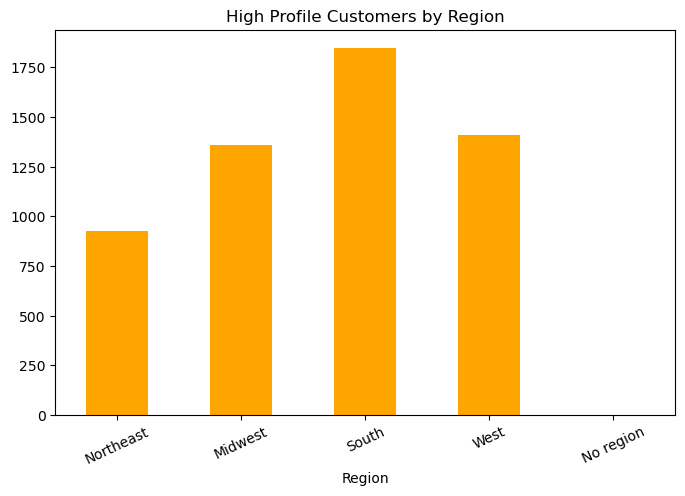

In [82]:
bar2_final_task = high_profilers['Region'].value_counts().sort_index().plot.bar(figsize=(8,5), title='High Profile Customers by Region', color='orange')
plt.xticks(rotation=25)
plt.show()

In [83]:
high_profilers['Region'].value_counts(dropna = False)

Region
South        1846
West         1412
Midwest      1357
Northeast     927
No region       0
Name: count, dtype: int64

In [84]:
# Saving
bar2_final_task.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar2_final_task4.10.png'))

In [36]:
# 7) Aggregating the max, mean and min variables on a customer-profile level for usage frequency and expenditure
df_merged_filtered_cleaned_final['order_number'].value_counts(dropna = False)

order_number
5.0     1540889
6.0     1393633
7.0     1262305
8.0     1152860
9.0     1059026
         ...   
95.0      13711
96.0      13004
97.0      12532
98.0      12084
99.0      11722
Name: count, Length: 95, dtype: int64

In [37]:
df_merged_filtered_cleaned_final['order_number'].head(15)

3      5.0
4      6.0
5      7.0
6      8.0
7      9.0
8     10.0
12     5.0
13     6.0
14     7.0
15     8.0
16     9.0
17    10.0
18     5.0
22     5.0
23     6.0
Name: order_number, dtype: float64

In [38]:
df_merged_filtered_cleaned_final['prices'].value_counts(dropna = False)

prices
12.3    445263
10.3    378243
4.0     325437
6.3     306643
1.3     305888
         ...  
21.4        78
22.7        68
21.5        58
21.0         7
18.3         7
Name: count, Length: 241, dtype: int64

In [39]:
df_merged_filtered_cleaned_final['prices'].head(15)

3     9.0
4     9.0
5     9.0
6     9.0
7     9.0
8     9.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    2.7
22    4.4
23    4.4
Name: prices, dtype: float64

In [40]:
# Data type check
print(df_merged_filtered_cleaned_final.dtypes)

order_id                   float64
user_id                    float64
order_number               float64
order_dow                  float64
order_hour_of_day          float64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order          float64
reordered                  float64
_merge1                   category
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
_merge2                   category
Busiest days                object
busiest_period_of_day       object
max_order                  float64
loyalty_flag                object
average_price               object
order_frequency             object
First Name                  object
Gender                      object
STATE                       object
Age                        float64
date_joined                 object
n_dependants               float64
fam_status                  object
income              

In [41]:
# New variable 'expenditure'
df_merged_filtered_cleaned_final['expenditure'] = df_merged_filtered_cleaned_final['prices'] * df_merged_filtered_cleaned_final['order_number']

In [42]:
df_merged_filtered_cleaned_final['expenditure'].value_counts(dropna = False)

expenditure
36.0      79119
63.0      74019
72.0      73038
84.0      71851
42.0      66124
          ...  
1271.2        1
2008.8        1
1643.4        1
2061.9        1
1622.4        1
Name: count, Length: 9690, dtype: int64

In [43]:
df_merged_filtered_cleaned_final['expenditure'].head(15)

3     45.0
4     54.0
5     63.0
6     72.0
7     81.0
8     90.0
12    15.0
13    18.0
14    21.0
15    24.0
16    27.0
17    30.0
18    13.5
22    22.0
23    26.4
Name: expenditure, dtype: float64

In [44]:
df_merged_filtered_cleaned_final.shape

(23097351, 34)

In [45]:
# Aggregating the max, mean and min variables on a customer-profile level
df_merged_filtered_cleaned_final.groupby('customer_profile').agg({'order_number': ['mean', 'min', 'max'], 'expenditure': ['mean', 'min', 'max']})

order_number            expenditure               
                              mean  min   max        mean    min     max
customer_profile                                                        
High profile customer    18.933237  5.0  99.0  472.837532  124.5  2465.1
Low profile customer     21.866675  5.0  99.0  170.230973    5.0  2465.1
Other                    22.015523  5.0  99.0  171.299440    5.0  2405.7

In [46]:
df_merged_filtered_cleaned_final.groupby('customer_profile').agg({'Age': ['mean', 'min', 'max'], 'income': ['mean', 'min', 'max'], 'expenditure': ['mean', 'min', 'max']})

Age                     income           \
                            mean   min   max           mean      min   
customer_profile                                                       
High profile customer  56.919343  30.0  81.0  118029.041321  26249.0   
Low profile customer   45.375328  18.0  81.0   95269.264012  25911.0   
Other                  55.465817  30.0  81.0  106719.704715  25903.0   

                                expenditure                 
                            max        mean    min     max  
customer_profile                                            
High profile customer  407316.0  472.837532  124.5  2465.1  
Low profile customer   593901.0  170.230973    5.0  2465.1  
Other                  584097.0  171.299440    5.0  2405.7

In [47]:
df_merged_filtered_cleaned_final.groupby('loyalty_flag').agg({'Age': ['mean', 'min', 'max'], 'income': ['mean', 'min', 'max'], 'expenditure': ['mean', 'min', 'max']})

Age                     income                     \
                       mean   min   max           mean      min       max   
loyalty_flag                                                                
Loyal customer    49.536486  18.0  81.0  100322.346799  25955.0  593901.0   
New customer      49.546779  18.0  81.0   97681.257304  25903.0  590790.0   
Regular customer  49.400122  18.0  81.0   99978.492585  25972.0  591089.0   

                 expenditure               
                        mean  min     max  
loyalty_flag                               
Loyal customer    271.557705  5.0  2465.1  
New customer       50.881861  5.0   250.0  
Regular customer  115.198368  5.0  1000.0

In [48]:
df_merged_filtered_cleaned_final.groupby('order_frequency').agg({'Age': ['mean', 'min', 'max'], 'income': ['mean', 'min', 'max'], 'expenditure': ['mean', 'min', 'max']})

Age                     income           \
                            mean   min   max           mean      min   
order_frequency                                                        
Frequent customer      49.492908  18.0  81.0  100089.546939  25911.0   
Non-frequent customer  49.464255  18.0  81.0   99323.711122  25903.0   
Regular customer       49.373137  18.0  81.0   99711.317228  25903.0   

                                expenditure               
                            max        mean  min     max  
order_frequency                                           
Frequent customer      593901.0  198.968922  5.0  2465.1  
Non-frequent customer  593901.0   92.289382  5.0  2107.0  
Regular customer       593901.0  126.710465  5.0  2425.0

In [49]:
# 8) Comparing customer profiles with regions and departments
# Grouped bar chart 'Customer Profiles by Region'
# Grouping & counting
grouped = df_merged_filtered_cleaned_final.groupby(['customer_profile', 'Region']).size().reset_index(name='count')

C:\Users\thoma\AppData\Local\Temp\ipykernel_7676\2350732056.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_merged_filtered_cleaned_final.groupby(['customer_profile', 'Region']).size().reset_index(name='count')


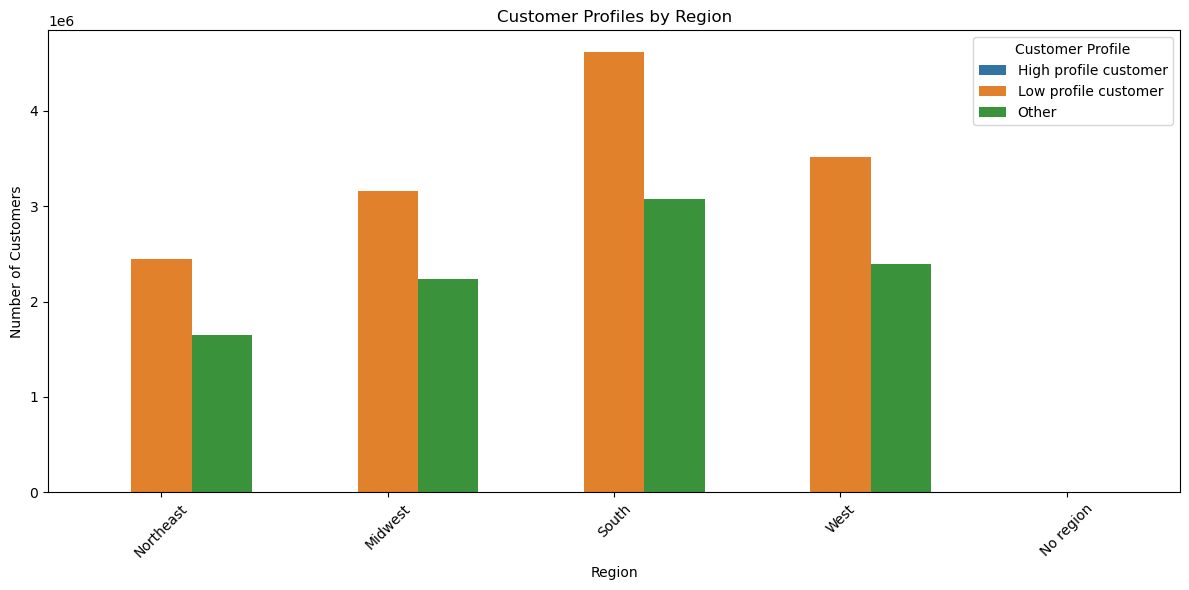

In [50]:
# Plotting
grouped_bar3_final_task = plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Region', y='count', hue='customer_profile')
plt.title('Customer Profiles by Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Profile')
plt.tight_layout()
plt.show()

In [51]:
grouped_bar3_final_task.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'grouped_bar3_final_task4.10.png'))

# The chart shows low profile customers concentrated primarily in the south

In [52]:
# 8) Comparing customer status with regions
# Grouped bar chart 'Customer Status by Region'
# Grouping & counting
grouped4 = df_merged_filtered_cleaned_final.groupby(['loyalty_flag', 'Region']).size().reset_index(name='count')

C:\Users\thoma\AppData\Local\Temp\ipykernel_7676\942724511.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped4 = df_merged_filtered_cleaned_final.groupby(['loyalty_flag', 'Region']).size().reset_index(name='count')


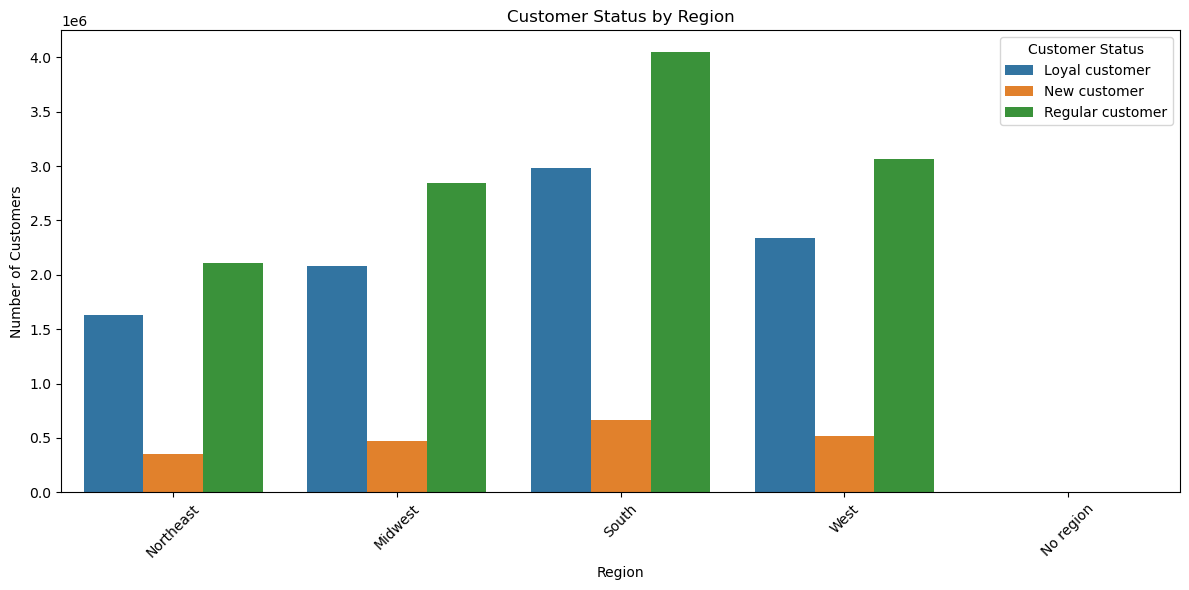

In [53]:
# Plotting
grouped_bar_customer_status_by_region = plt.figure(figsize=(12, 6))
sns.barplot(data=grouped4, x='Region', y='count', hue='loyalty_flag')
plt.title('Customer Status by Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()

In [54]:
grouped_bar_customer_status_by_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'grouped_bar_customer_status_by_region.png'))

In [55]:
grouped5 = df_merged_filtered_cleaned_final.groupby(['fam_status', 'Region']).size().reset_index(name='count')

C:\Users\thoma\AppData\Local\Temp\ipykernel_7676\2218648709.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped5 = df_merged_filtered_cleaned_final.groupby(['fam_status', 'Region']).size().reset_index(name='count')


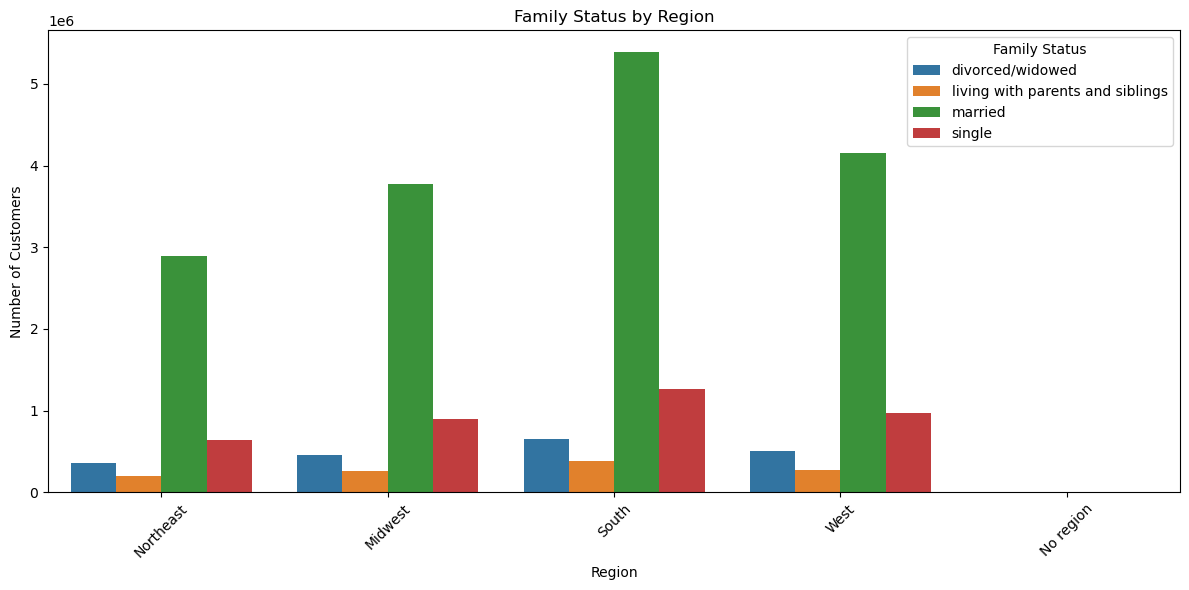

In [56]:
grouped_bar_fam_status_by_region = plt.figure(figsize=(12, 6))
sns.barplot(data=grouped5, x='Region', y='count', hue='fam_status')
plt.title('Family Status by Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Family Status')
plt.tight_layout()
plt.show()

In [57]:
grouped_bar_fam_status_by_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'grouped_bar_fam_status_by_region.png'))

In [58]:
grouped6 = df_merged_filtered_cleaned_final.groupby(['loyalty_flag', 'fam_status']).size().reset_index(name='count')

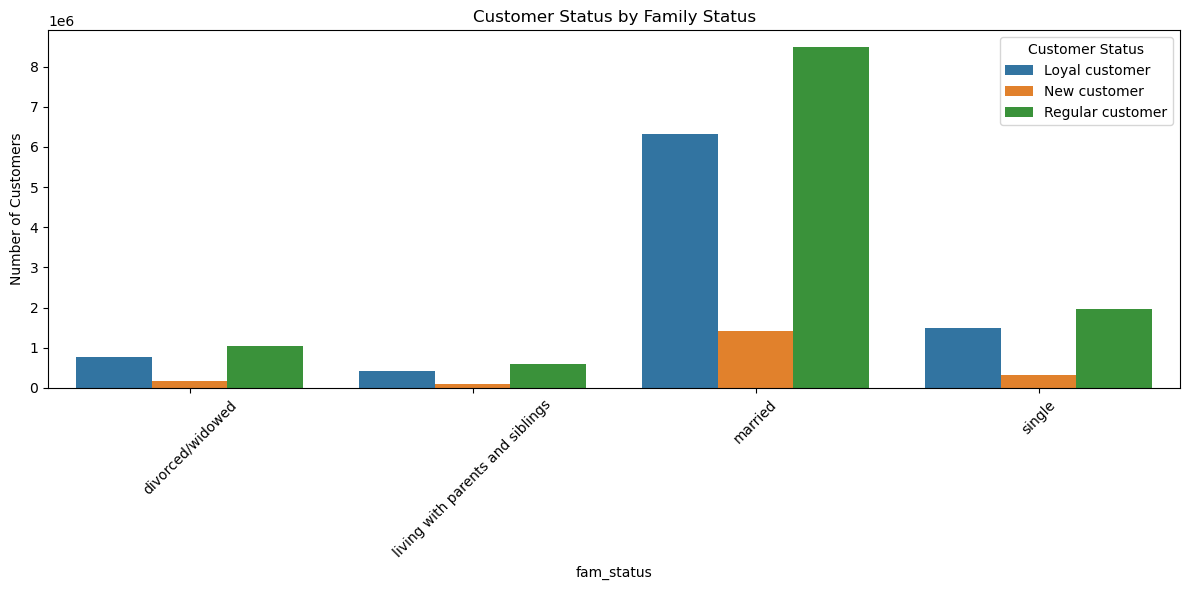

In [59]:
grouped_bar_cust_status_by_fam_status = plt.figure(figsize=(12, 6))
sns.barplot(data=grouped6, x='fam_status', y='count', hue='loyalty_flag')
plt.title('Customer Status by Family Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()

In [60]:
grouped_bar_cust_status_by_fam_status.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'grouped_bar_cust_status_by_fam_status.png'))

In [61]:
# Grouped bar chart 'Customer Profiles by Department'
# Grouping & counting
grouped2 = df_merged_filtered_cleaned_final.groupby(['customer_profile', 'department_id']).size().reset_index(name='count')

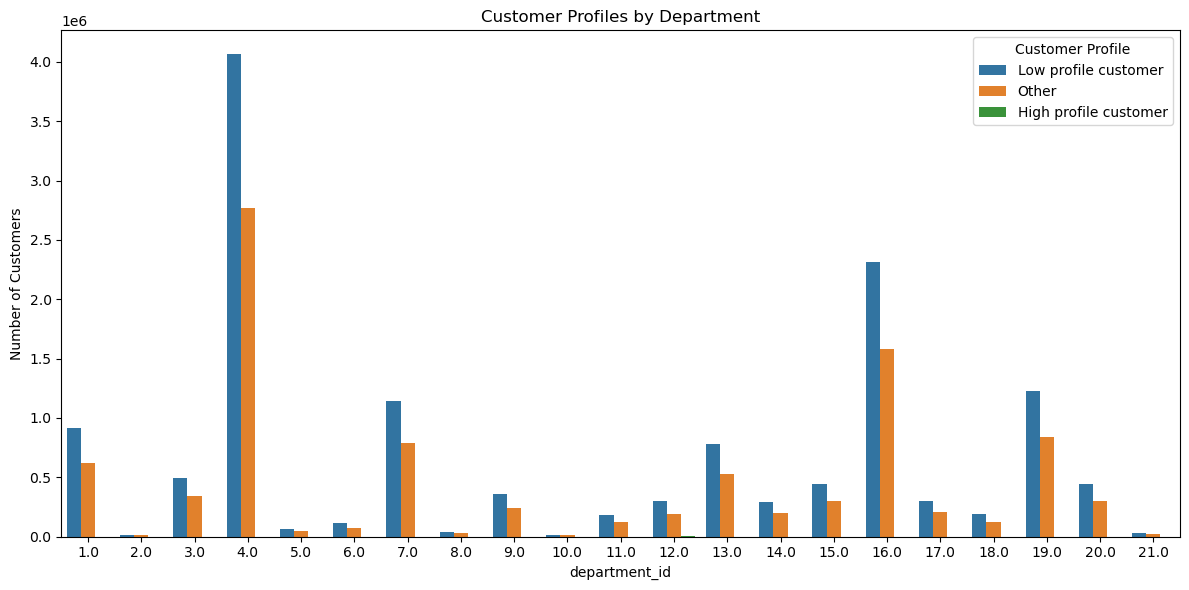

In [62]:
# Plotting
grouped_bar4_final_task = plt.figure(figsize=(12, 6))
sns.barplot(data=grouped2, x='department_id', y='count', hue='customer_profile')
plt.title('Customer Profiles by Department')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Profile')
plt.tight_layout()
plt.show()

In [63]:
grouped_bar4_final_task.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'grouped_bar4_final_task4.10.png'))

# This chart shows low profile customers concentrated primarily in department_id 4

In [64]:
# Grouped bar chart 'High Profile Customers by Department'
# New dataframe df_high_profilers
df_high_profilers = df_merged_filtered_cleaned_final[df_merged_filtered_cleaned_final['customer_profile'] == 'High profile customer']

In [65]:
# Grouping & counting
grouped3 = df_high_profilers.groupby('department_id').size().reset_index(name='count')

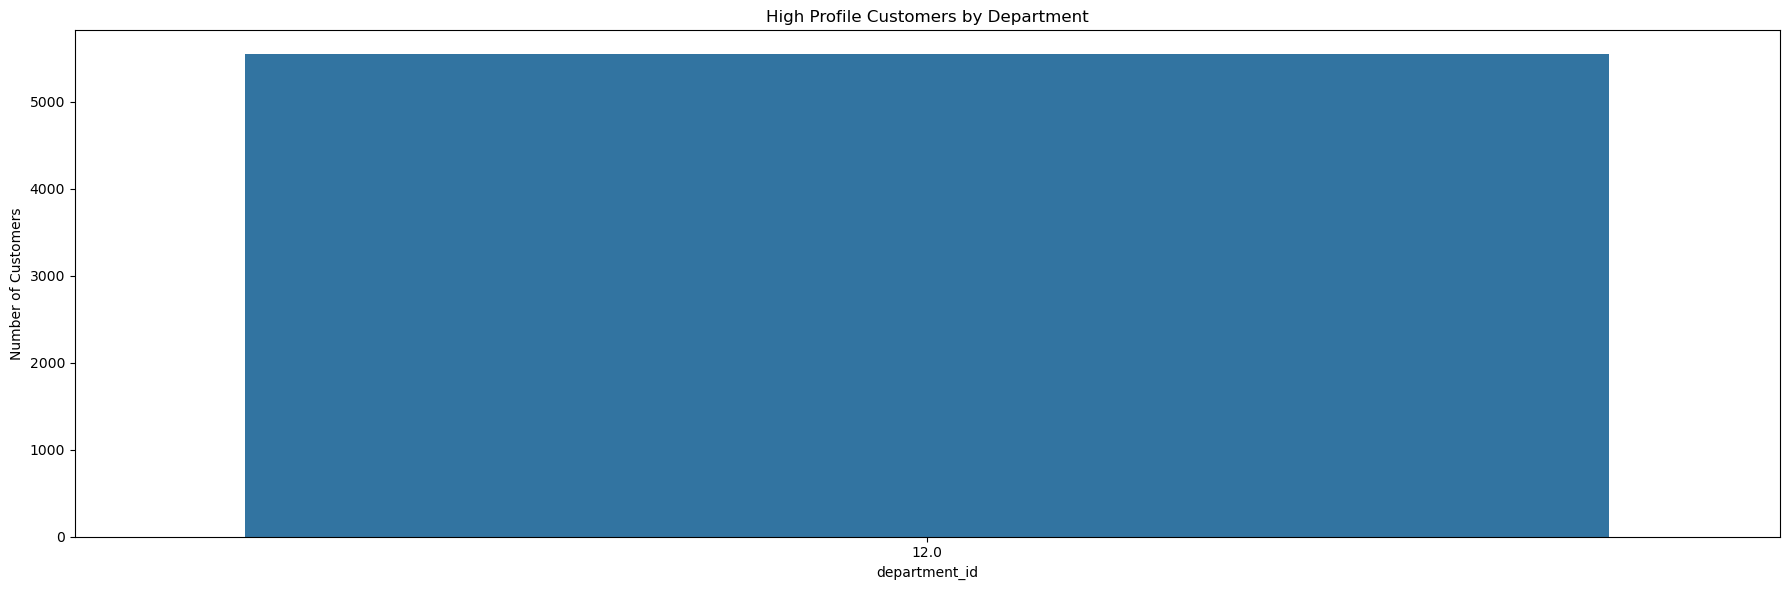

In [66]:
# Plotting
grouped_bar5_final_task = plt.figure(figsize=(18, 6))
sns.barplot(data=grouped3, x='department_id', y='count')
plt.title('High Profile Customers by Department')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [67]:
grouped_bar5_final_task.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'grouped_bar5_final_task4.10.png'))

# The chart shows that high profile customers are concentrated only in one department, as most expensive products are part of their label definition

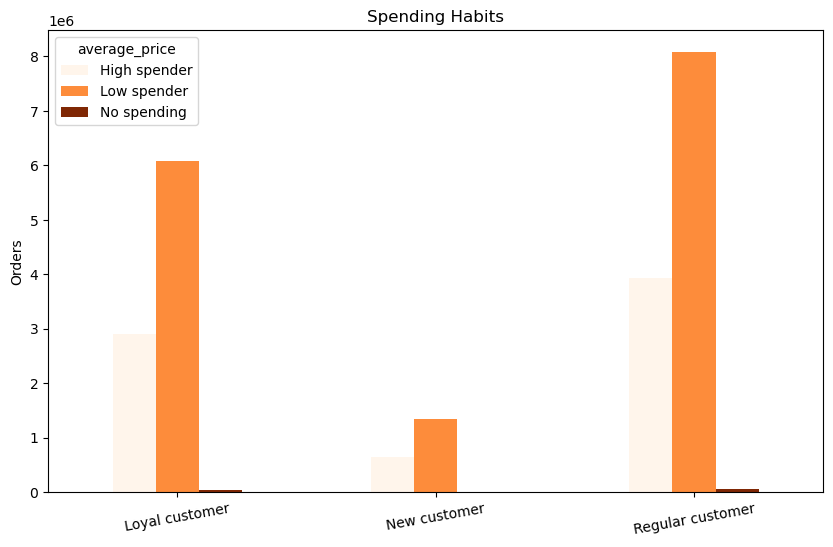

In [80]:
bar = df_merged_filtered_cleaned_final.value_counts(['loyalty_flag', 'average_price']).unstack().plot(kind='bar', figsize=(10,6), title='Spending Habits', colormap='Oranges')
plt.xticks(rotation=10)
bar.set_xlabel('')
bar.set_ylabel('Orders')
plt.show()

In [81]:
# Saving
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar6_spending_habits.png'))

In [71]:
crosstab_2 = pd.crosstab(df_merged_filtered_cleaned_final['loyalty_flag'], df_merged_filtered_cleaned_final['average_price'], dropna = False)

In [72]:
crosstab_2.to_clipboard()

In [73]:
crosstab_2

average_price,High spender,Low spender,No spending
loyalty_flag,,,
Loyal customer,2910454,6074576,42885
New customer,653451,1338891,10108
Regular customer,3929078,8079004,58904


In [74]:
df_merged_filtered_cleaned_final.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge1', 'product_name', 'aisle_id', 'department_id',
       'prices', '_merge2', 'Busiest days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price', 'order_frequency',
       'First Name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge', 'Region', 'exclusion_flag',
       'customer_profile', 'expenditure'],
      dtype='object')

In [75]:
# Renaming unintuitive variables - variable 'order_dow'
df_merged_filtered_cleaned_final.rename(columns = {'order_dow' : 'order_day_of_week'}, inplace = True)

In [76]:
df_merged_filtered_cleaned_final.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge1', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge2', 'Busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'order_frequency', 'First Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'Region', 'exclusion_flag', 'customer_profile', 'expenditure'],
      dtype='object')

In [77]:
df_merged_filtered_cleaned_final.rename(columns = {'_merge' : '_merge3'}, inplace = True)

In [78]:
df_merged_filtered_cleaned_final.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge1', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge2', 'Busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'order_frequency', 'First Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge3',
       'Region', 'exclusion_flag', 'customer_profile', 'expenditure'],
      dtype='object')

In [79]:
# Exporting the dataframe
df_merged_filtered_cleaned_final.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pr_merged_filtered_cleaned_final_task4.10(3).pkl'))